In [9]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install pandas_profiling

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [75]:
#------------------------Required libraries--------------------------------#
from __future__ import division
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msgno
import sklearn
import pandas_profiling
from dateutil.parser import parse
import warnings
from datetime import datetime,timedelta
warnings.filterwarnings('ignore')
%matplotlib inline

Dans ce notebook nous allons nous intéresser à étudier à analyser, à travers diverses visualisations, les données des compétitions de tennis masculins ATP de 1968 à 2016, y compris les compétitions de Grand Slams, Masters Series, Masters Cup and International Series competitions, en utilisant l'apprentissage automatique (Machine Learning). Pour cela nous allons suivre la méthode CRISP-DM illustrée ci-dessous :

<img src="crisp_process.jpg">

### Problématique :

<b>Objectif : </b> Gagner de l'argent sur les paris sportifs de tennis

###### Traduction de la problématique en Data Mining : 

<mark>Apprentissage supervisé qui consiste à trouver un modèle de régression (régression linéaire, méthodes ensemblistes, réseau de neuronesn SVM, etc) permettant d'estimer les résultats des matches sportifs de tennis.</mark>

# 1. Compréhension du marché

à faire plus tard  ...

# 2. Compréhension des données 

Cette partie implique l'étude des données à disposition sur des matches sportifs de tennis. Cette étape a un poids important dans la méthode CRISP-DM car elle permet d'éviter les problèmes inattendus au cours de la phase de la préparation des données. Pour bien amener cette étape, nous allons suivre les étapes suivantes :

### A : Collecte des données initiales:



###### Sources des données :



Les données à disposition proviennent du site kaggle. Un petit sur le droit d'utilisation de ces donnnées  :  on a le droit d'utilisation de ces données sous réserve le respect des droits d'utilisation annoncée par Kaggle ([pour plus de détails](https://www.kaggle.com/terms)).

- <b>ATP.csv</b>  :  L'ensemble de données contient des informations détaillées sur tous les matchs ATP disputés depuis 1968. L'ensemble de données comporte de nombreuses valeurs manquantes, en particulier pour la période comprise entre 1968 et 1991.

###### Attributs prometteurs :



Etant donné la problématique et les données, nous pouvons pas dés maintenant  procéder à un filtrage des attributs. Pour le moment tous les attributs sont prometteurs sans exception.

### B. Description des données



In [95]:
#laod data : 
tennis_df_all = pd.read_csv('ATP.csv', index_col= 0)  # set Id to be the index column


In [27]:
print("# ---> Shape of our dataframes : ")
print(" tennis_df_all dataframe has {} examples with {} features (target variable included) and  with a total number of missing values equal to {}.".format(tennis_df_all.shape[0],tennis_df_all.shape[1], tennis_df_all.isnull().sum().sum()))



# ---> Shape of our dataframes : 
 tennis_df_all dataframe has 163966 examples with 48 features (target variable included) and  with a total number of missing values equal to 2335533.


In [81]:
#tennis_df_all.dtypes

aprés avoir vu l'output de tennis_df_all.dtypes, on remarque que le type de chaque variable est cohérent avec les données qu'elle dispose.

Nous allons utiliser le module pandas_profiling pour décrire nos données d'une façon plus claire et concise.

In [44]:
#pandas_profiling.ProfileReport(tennis_df_all)

In [83]:
tennis_df_all.head(5)

,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,timestamp
tourney_id,,,,,,,,,,,,,,,,,,,,,
1968-580,Australian Chps.,Grass,64,G,19680119,1,110023,NaN,NaN,Richard Coulthard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968-01-19
1968-580,Australian Chps.,Grass,64,G,19680119,2,109803,NaN,NaN,John Brown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968-01-19
1968-580,Australian Chps.,Grass,64,G,19680119,3,100257,NaN,NaN,Ross Case,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968-01-19
1968-580,Australian Chps.,Grass,64,G,19680119,4,100105,5,NaN,Allan Stone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968-01-19
1968-580,Australian Chps.,Grass,64,G,19680119,5,109966,NaN,NaN,Warren Jacques,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1968-01-19


###### Types de valeur :

In [113]:
print(list(tennis_df_all.dtypes.unique()))

[dtype('O'), dtype('int64'), dtype('float64'), dtype('<M8[ns]')]


In [59]:
print("Total number of matches : "+str(len(tennis_df_all)))

Total number of matches : 163966


In [99]:
print("columns names"+str(list(tennis_df_all.columns)))

columns names['tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'timestamp']


###### Méthode de codage 



La  partie ci-dessus nous permet déjà de penser aux types de codage qui sera utilisé par la suite lors de la modélisation. Pour les variables catégorielles seront codées en utilisant par example le <b>Hot encoding</b>.

In [146]:
# Cast specific columns
tennis_df_all = tennis_df_all[tennis_df_all['tourney_date'] != 'tourney_date']
tennis_df_all['winner_id'] = pd.to_numeric(tennis_df_all['winner_id'])
tennis_df_all['loser_id'] = pd.to_numeric(tennis_df_all['loser_id'])
tennis_df_all['match_num'] = pd.to_numeric(tennis_df_all['match_num'])
tennis_df_all['winner_rank'] = pd.to_numeric(tennis_df_all['winner_rank'])
tennis_df_all['loser_rank'] = pd.to_numeric(tennis_df_all['loser_rank'])
tennis_df_all['winner_age'] = pd.to_numeric(tennis_df_all['winner_age'])
tennis_df_all['loser_age'] = pd.to_numeric(tennis_df_all['loser_age'])
tennis_df_all['winner_ht'] = pd.to_numeric(tennis_df_all['winner_ht'])
tennis_df_all['loser_ht'] = pd.to_numeric(tennis_df_all['loser_ht'])
tennis_df_all['w_svpt'] = pd.to_numeric(tennis_df_all['w_svpt'])
tennis_df_all['l_svpt'] = pd.to_numeric(tennis_df_all['l_svpt'])
tennis_df_all['w_ace'] = pd.to_numeric(tennis_df_all['w_ace'])
tennis_df_all['l_ace'] = pd.to_numeric(tennis_df_all['l_ace'])
tennis_df_all['w_df'] = pd.to_numeric(tennis_df_all['w_df'])
tennis_df_all['l_df'] = pd.to_numeric(tennis_df_all['l_df'])
tennis_df_all['w_bpSaved'] = pd.to_numeric(tennis_df_all['w_bpSaved'])
tennis_df_all['l_bpSaved'] = pd.to_numeric(tennis_df_all['l_bpSaved'])
tennis_df_all['best_of'] = pd.to_numeric(tennis_df_all['best_of'])

In [125]:
tennis_df_all['timestamp'] = tennis_df_all.loc[:,'tourney_date'].apply(lambda x: parse(str(x)))
tennis_df_all = tennis_df_all.set_index(tennis_df_all['timestamp'])

###### Qualité des données : 

Les données sont rarement présentées bien nettoyées. En fait, les données généralement contiennent des valeurs manquantes, des points aberrants, des erreurs de saisie etc. Dans notre cas, nous avons déjà remarqué qu'il aie des valeurs manquantes. La partie de la préparation des données sera le moment de traiter ces points.

### D. Exploration des données :



<b>Pourquoi ?</b>

- Permettre de bien connaître nos données d'apprentissage 
- Identifier les attributs (features) prometteurs
- Identifier des missing data et comment les traiter par la suite
- Identifier des outliers (points abberants) et le traitement correspondant

Le <i>Heatmap c'est la façon la plus rapide pour gagner un apérçu clair sur les données à disposition.</i>

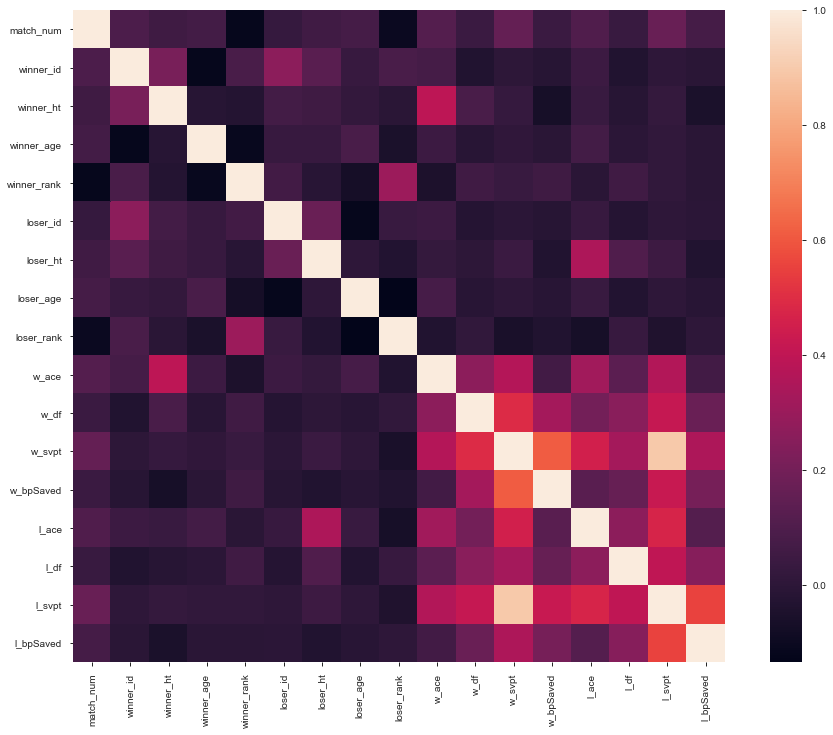

In [112]:
# Build the correlation matrix
matrix = tennis_df_all.corr()  # corrélation using only int and float features.
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, vmax=1.0, square=True)

Ce heatmap est très intéressant dans la mesure où il permet de détecter à la fois les variables les plus prometteuses et des multicolinéaritées. Nous verrons ceci en détail par la suite.

##### D.3 :  Missing Data 

In [131]:
num_missing = tennis_df_all.isnull().sum()
percent = num_missing / tennis_df_all.isnull().count()
df_missing = pd.concat([num_missing, percent], axis=1, keys=['MissingValues', 'Fraction'])
df_missing = df_missing.sort_values('Fraction', ascending=False)
df_missing[df_missing['MissingValues'] > 0]

,MissingValues,Fraction
winner_entry,150046,0.915110
loser_entry,139864,0.853011
loser_seed,132467,0.807898
winner_seed,100947,0.615662
minutes,89088,0.543335
l_ace,86565,0.527948
w_svpt,86565,0.527948
w_df,86565,0.527948
w_ace,86565,0.527948
w_2ndWon,86565,0.527948


Any pattern ? 

Traiter les valeurs maquantes revient à savoir les mécanismes dérier (MAR, MCAR, MNAR)

Une carte de chaleur de corrélation (heatmap correlation simple est montrée ci-dessous. Cette carte décrit le degré de relation de nullité entre les différentes caractéristiques. La plage de cette corrélation de nullité va de -1 à 1 (-1 ≤ R ≤ 1). Les variables sans valeur manquante sont exclues du heatmap. Si la corrélation de nullité est très proche de zéro (-0,05 <R <0,05) (par exemple: catr vs catr), aucune valeur ne sera affichée. En outre, une corrélation de nullité positive parfaite (R = 1) indique que la première variable et la deuxième variable ont toutes les deux des valeurs manquantes correspondantes (MAR) alors qu'une corrélation de nullité négative parfaite (R = -1) signifie que l'une des variables est manquante alors que la seconde ne l'est pas (MNAR).

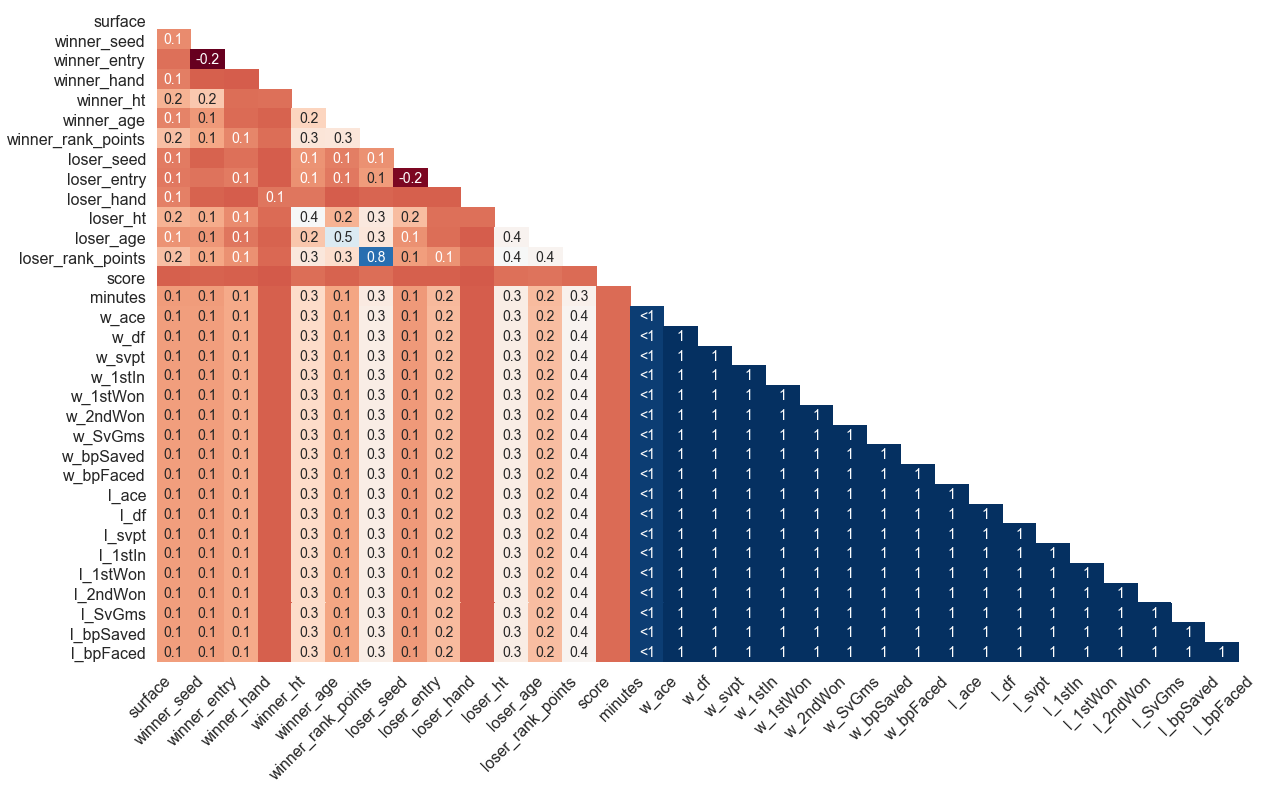

In [133]:
import missingno as msno
msno.heatmap(tennis_df_all)

# 4. Modélisation & Evaluation

### 4.1 : avec les 4 variables choisies 


In [151]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
pred_vars = [
    'match_num',
    'winner_rank',
    'loser_id',
    'loser_rank',
]
target_var = 'winner_id'

X = tennis_df_all[pred_vars]
y = tennis_df_all[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
model = OneHotEncoder(handle_unknown='ignore')
model = RandomForestRegressor(n_estimators=300, random_state=42, max_depth=3,)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

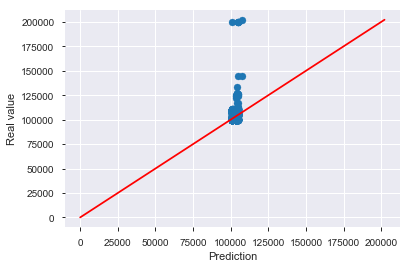

In [154]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
# Build a plot
plt.scatter(y_pred_test, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')
# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [155]:
# avec my_features :
from math import sqrt

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error
print("----> Training results : ")
print('MSE:\t$%.2f' % sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE:\t$%.2f' % mean_absolute_error(y_train, y_pred_train))
print('MSLE:\t%.5f' % mean_squared_log_error(y_train, y_pred_train)) # good metric when there are outliers


print('-------> Test results : ')
print('MSE:\t$%.2f' % sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE:\t$%.2f' % mean_absolute_error(y_test, y_pred_test))
print('MSLE:\t%.5f' % mean_squared_log_error(y_test, y_pred_test)) # good metric when there are outliers

----> Training results : 
MSE:	$2347.13
MAE:	$799.24
MSLE:	0.00035
-------> Test results : 
MSE:	$2419.79
MAE:	$820.81
MSLE:	0.00037


# 5. Déploiement 

A compléter